# Data analysis : Enseignement Superieur

## Step 0 : Preparations

### Step 0.1 : Import libraries

In [17]:
import pandas as pds
from matplotlib import pyplot as plt
import seaborn as sns

### Step 0.2 : Load files, or call API

In [18]:
df15 = pds.read_csv('15-16.csv', sep=';')
df16 = pds.read_csv('16-17.csv', sep=';')
df17 = pds.read_csv('17-18.csv', sep=';')
df18 = pds.read_csv('18-19.csv', sep=';')
df19 = pds.read_csv('19-20.csv', sep=';')
df20 = pds.read_csv('20-21.csv', sep=';')

### Step 0.3 : Fusionner les données

In [19]:
tupledf = (df16,df17,df18,df19,df20)
df = df15.append(tupledf)
pds.set_option('display.max_columns', None)
df

,Année universitaire,Niveau géographique,Unité géographique,regroupement,Regroupements de formations ou d’établissements,secteur,Secteur de l’établissement d’inscription,sexe,Sexe de l’étudiant,Nombre total d’étudiants inscrits,Nombre total d’étudiants inscrits hors doubles inscriptions université/CPGE (voir documentation),A des effectifs en formations de DUT,Nombre d’étudiants inscrits en DUT,A des effectifs en formations d'ingénieurs,Nombre d’étudiants inscrits dans les formations d’Ingénieur,A des effectifs en master MEEF dans les ESPE et INSPE,Nombre d’étudiants inscrits dans les master MEEF dans les ESPE et INSPE,diffusable,Données diffusables,secret,Données soumises au secret statistique,niveau_geo,Identifiant de l’unité géographique,Identifiant de la région,Identifiant de l'académie,Identifiant du département,Identifiant de l'unité urbaine,Rentrée,Année civile concernée
0,2015-16,Département,Landes,STS,Sections de techniciens supérieurs (STS) et as...,PR,Établissements privés,1,Masculin,28,NaN,non,NaN,non,NaN,non,NaN,oui,Données diffusables,non,Autres données,DEPARTEMENT,D040,R75,A04,D040,NaN,2015,2016
1,2015-16,Département,Landes,TOTAL,Total des formations d'enseignement supérieur,PR,Établissements privés,1,Masculin,28,NaN,non,NaN,non,NaN,non,NaN,oui,Données diffusables,non,Autres données,DEPARTEMENT,D040,R75,A04,D040,NaN,2015,2016
2,2015-16,Département,Landes,EC_PARAM,Écoles paramédicales et sociales,PU,Établissements publics,1,Masculin,82,NaN,non,NaN,non,NaN,non,NaN,oui,Données diffusables,non,Autres données,DEPARTEMENT,D040,R75,A04,D040,NaN,2015,2016
3,2015-16,Département,Landes,TOTAL,Total des formations d'enseignement supérieur,PU,Établissements publics,2,Feminin,1152,NaN,oui,89.0,non,NaN,oui,154.0,oui,Données diffusables,non,Autres données,DEPARTEMENT,D040,R75,A04,D040,NaN,2015,2016
4,2015-16,Département,Landes,UNIV,Universités,PU,Établissements publics,1,Masculin,303,NaN,oui,173.0,non,NaN,oui,22.0,oui,Données diffusables,non,Autres données,DEPARTEMENT,D040,R75,A04,D040,NaN,2015,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,2020-21,Département,Landes,TOTAL,Total des formations d'enseignement supérieur,PU,Établissements publics,1,Masculin,1105,1105.0,oui,186.0,non,NaN,oui,16.0,oui,Données diffusables,non,Autres données,DEPARTEMENT,D040,R75,A04,D040,NaN,2020,2021
14,2020-21,Département,Landes,TOTAL,Total des formations d'enseignement supérieur,PR,Établissements privés,2,Feminin,311,311.0,non,NaN,non,NaN,non,NaN,oui,Données diffusables,non,Autres données,DEPARTEMENT,D040,R75,A04,D040,NaN,2020,2021
15,2020-21,Département,Landes,EC_ART,Écoles supérieures art et culture,PR,Établissements privés,1,Masculin,107,107.0,non,NaN,non,NaN,non,NaN,oui,Données diffusables,non,Autres données,DEPARTEMENT,D040,R75,A04,D040,NaN,2020,2021
16,2020-21,Département,Landes,EC_autres,Autres écoles de spécialités diverses,PR,Établissements privés,1,Masculin,45,45.0,non,NaN,non,NaN,non,NaN,oui,Données diffusables,non,Autres données,DEPARTEMENT,D040,R75,A04,D040,NaN,2020,2021


## Step 1 : Exploratory Data Analysis

### Step 1.1 : Check data shape

In [4]:
df.shape

(96, 29)

### Step 1.2 : Check each data type of columns and missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 17
Data columns (total 29 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Année universitaire                                                                               96 non-null     object 
 1   Niveau géographique                                                                               96 non-null     object 
 2   Unité géographique                                                                                96 non-null     object 
 3   regroupement                                                                                      96 non-null     object 
 4   Regroupements de formations ou d’établissements                                                   96 non-null     object 
 5   sec

### Step 1.3 : Check the percentages of missing value

In [6]:
df.isnull().sum() / df.shape[0] * 100

Année universitaire                                                                                   0.00
Niveau géographique                                                                                   0.00
Unité géographique                                                                                    0.00
regroupement                                                                                          0.00
Regroupements de formations ou d’établissements                                                       0.00
secteur                                                                                               0.00
Secteur de l’établissement d’inscription                                                              0.00
sexe                                                                                                  0.00
Sexe de l’étudiant                                                                                    0.00
Nombre total d’étudiants inscrits    

### Step 1.4 : Summary Statistics

In [9]:
df.describe()

,sexe,Nombre total d’étudiants inscrits,Nombre total d’étudiants inscrits hors doubles inscriptions université/CPGE (voir documentation),Nombre d’étudiants inscrits en DUT,Nombre d’étudiants inscrits dans les formations d’Ingénieur,Nombre d’étudiants inscrits dans les master MEEF dans les ESPE et INSPE,Identifiant de l'unité urbaine,Rentrée,Année civile concernée
count,96.000000,96.000000,54.000000,24.000000,0.0,24.000000,0.0,96.000000,96.000000
mean,1.500000,320.020833,305.185185,134.083333,NaN,78.416667,NaN,2017.729167,2018.729167
std,0.502625,342.583097,340.021868,54.497640,NaN,62.344706,NaN,1.663725,1.663725
min,1.000000,1.000000,1.000000,69.000000,NaN,11.000000,NaN,2015.000000,2016.000000
25%,1.000000,62.000000,49.250000,85.750000,NaN,18.250000,NaN,2016.000000,2017.000000
50%,1.500000,210.000000,173.000000,131.000000,NaN,76.500000,NaN,2018.000000,2019.000000
75%,2.000000,387.250000,332.250000,187.000000,NaN,124.500000,NaN,2019.000000,2020.000000
max,2.000000,1155.000000,1155.000000,204.000000,NaN,176.000000,NaN,2020.000000,2021.000000


### Step 1.5 : Check value counts for a specific column

In [8]:
# Checking Annee universitaire data
df['Année universitaire'].value_counts()

2018-19    18
2019-20    18
2020-21    18
2017-18    16
2016-17    14
2015-16    12
Name: Année universitaire, dtype: int64

### Step 1.6 : Check duplicate values

### Step 1.7 : See the data distribution and data anomaly

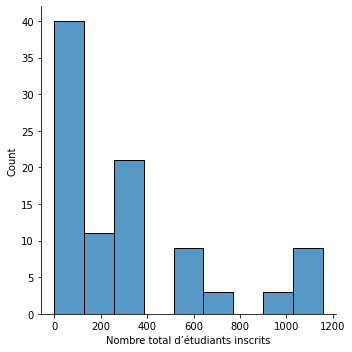

In [13]:
# Plot the histogram to see the distribution of the point data.
sns.displot(df, x="Nombre total d’étudiants inscrits")

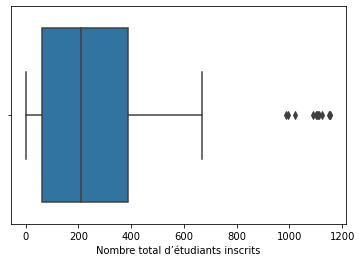

In [14]:
ax = sns.boxplot(x=df["Nombre total d’étudiants inscrits"])

### Step 1.8 : Check the correlation between variables in the data

<AxesSubplot:>

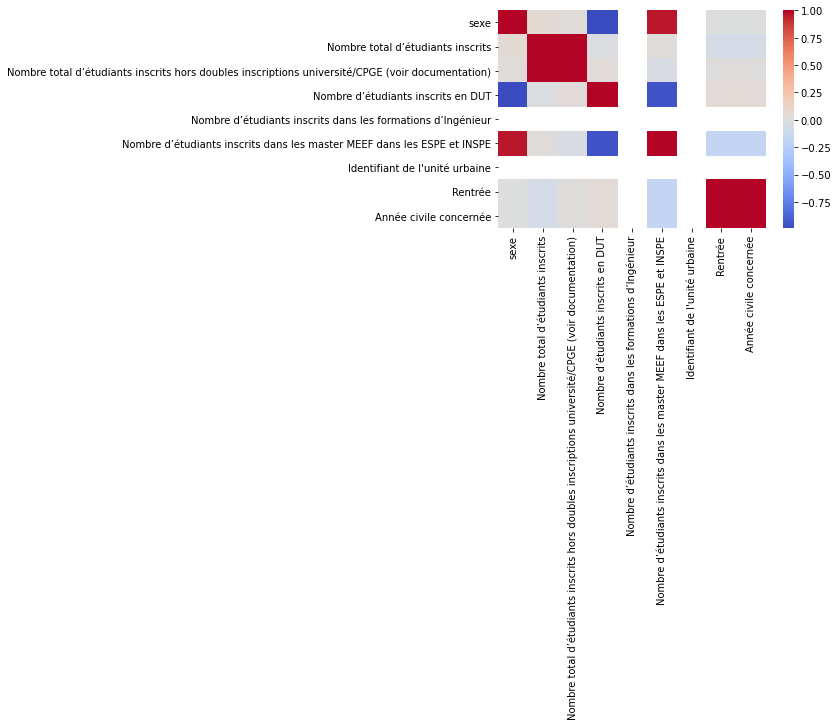

In [15]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, cmap= 'coolwarm')

## Step 3 : Data meaning

### Analyse

In [34]:
# nb d'étudiant par année, par type de formation, par PR ou PU
year_formation_df = df.groupby(['Année universitaire','regroupement'])
year_secteur_df = df.groupby(['Année universitaire','secteur'])

formation_df_moy = year_formation_df['Nombre total d’étudiants inscrits'].mean()
secteur_df_moy = year_secteur_df['Nombre total d’étudiants inscrits'].mean()


df_indicators = pds.merge(formation_df_moy, secteur_df_moy, on='Année universitaire', how='outer')
df_indicators

,Nombre total d’étudiants inscrits_x,Nombre total d’étudiants inscrits_y
Année universitaire,,
2015-16,302.50,80.00
2015-16,302.50,534.75
2015-16,267.75,80.00
2015-16,267.75,534.75
2015-16,574.75,80.00
...,...,...
2020-21,280.50,565.00
2020-21,698.25,106.60
2020-21,698.25,565.00
